In [247]:
%pylab inline
import pickle

import pandas as pd
import numpy as np
import matplotlib as pl

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import fill_between

Populating the interactive namespace from numpy and matplotlib


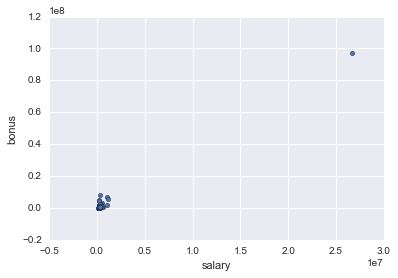

In [273]:
df = pd.read_pickle("/Users/karansagoo/PycharmProjects/Resume/ENRON_final1/data/enron_pd.pkl")
df.drop(["name","email_address"], axis = 1, inplace = True)
cols = df.columns
df = df.astype(float)
df.plot(x = 'salary', y = 'bonus',kind = 'scatter')

In [274]:
allFeatures = ['poi', 
'bonus','deferral_payments',
'deferred_income', 'director_fees','exercised_stock_options','expenses',
'from_messages','from_poi_to_this_person','from_this_person_to_poi',
'loan_advances','other','restricted_stock','restricted_stock_deferred', 'salary',
'shared_receipt_with_poi','to_messages','total_payments','total_stock_value']

features_list = ["deferral_payments", 
                  "restricted_stock_deferred",
                  "loan_advances",
                  "director_fees",
                  "deferred_income"]

a = set(allFeatures)
b = set(features_list)

features_list = list(a-b)
df = df[features_list]

df.loc[df.salary > 2.0*1e7]
df.drop(104,inplace = True);

In [249]:
df.reset_index(drop = True, inplace=True)
df.loc[104];
# poiSalaryMean = df1[(df1["poi"] == 1) & (df1.salary != "NaN")]["salary"].mean()
# df.set_value(126, 'salary', poiSalaryMean)
# df1.loc[126]

poi                                  0.0
salary                        26704229.0
to_messages                          NaN
deferral_payments             32083396.0
total_payments               309886585.0
exercised_stock_options      311764000.0
bonus                         97343619.0
restricted_stock             130322299.0
shared_receipt_with_poi              NaN
restricted_stock_deferred     -7576788.0
total_stock_value            434509511.0
expenses                       5235198.0
loan_advances                 83925000.0
from_messages                        NaN
other                         42667589.0
from_this_person_to_poi              NaN
director_fees                  1398517.0
deferred_income              -27992891.0
long_term_incentive           48521928.0
from_poi_to_this_person              NaN
Name: 104, dtype: float64

In [275]:
df.replace(to_replace ="NaN" , value = np.nan, inplace = True)

In [276]:
df.isnull().sum()

salary                     51
to_messages                59
total_payments             21
bonus                      64
total_stock_value          20
expenses                   51
exercised_stock_options    44
from_messages              59
other                      53
from_this_person_to_poi    59
poi                         0
shared_receipt_with_poi    59
restricted_stock           36
from_poi_to_this_person    59
dtype: int64

In [279]:
df.set_value(126,"bonus", df[(df["poi"] == 1) & (df.bonus.isnull())]["salary"].mean());

In [280]:
df1 =df[df.poi == 1][features_list].copy()

In [281]:
df1 =df1.fillna(df1.mean(),inplace = True)

In [282]:
df1.isnull().sum()

salary                     0
to_messages                0
total_payments             0
bonus                      0
total_stock_value          0
expenses                   0
exercised_stock_options    0
from_messages              0
other                      0
from_this_person_to_poi    0
poi                        0
shared_receipt_with_poi    0
restricted_stock           0
from_poi_to_this_person    0
dtype: int64

In [286]:
# df4 = pd.merge(df,df1, on = features_list, left_index=True, how = 'outer').copy()
# df4[df4.poi == 1][features_list].isnull().sum()
df4 = df.copy()
df4.fillna(df1,inplace = True)
df4[df4.poi == 1][features_list].isnull().sum()
df4[df4.poi == 1][features_list].isnull().sum()

salary                     0
to_messages                0
total_payments             0
bonus                      0
total_stock_value          0
expenses                   0
exercised_stock_options    0
from_messages              0
other                      0
from_this_person_to_poi    0
poi                        0
shared_receipt_with_poi    0
restricted_stock           0
from_poi_to_this_person    0
dtype: int64

In [290]:
d = df4.copy()
d.dropna(thresh = 4, inplace = True)

d.shape

(128, 14)

In [291]:
d.isnull().sum()

salary                     33
to_messages                38
total_payments             15
bonus                      45
total_stock_value           7
expenses                   41
exercised_stock_options    24
from_messages              38
other                      38
from_this_person_to_poi    38
poi                         0
shared_receipt_with_poi    38
restricted_stock           20
from_poi_to_this_person    38
dtype: int64

In [292]:
d.fillna(0,inplace = True);

In [293]:
cols = list (d.columns)
print cols

['salary', 'to_messages', 'total_payments', 'bonus', 'total_stock_value', 'expenses', 'exercised_stock_options', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'shared_receipt_with_poi', 'restricted_stock', 'from_poi_to_this_person']


In [294]:
cols[0], cols[10] = cols[10], cols[0]

In [295]:
dff = d[cols].copy()

In [301]:
train_data = dff.values

In [311]:
features =train_data[0::,1::]
labels = train_data[0::,0]

In [322]:
from time import time
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.cross_validation import train_test_split


# split data inton training and testing
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.4, random_state = 42)


# choose decision tree
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'



# list of importance features
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
print 'Feature Ranking: '
for i in range(13):
    print "{} feature {} ({})".format(i+1,features_list[i+1],importances[indices[i]])

Accuracy: 0.807692307692
Precision:  0.357142857143
Recall:  0.833333333333
Decision Tree algorithm run time:  0.003 s
Feature Ranking: 
1 feature to_messages (0.444444444444)
2 feature total_payments (0.249751984127)
3 feature bonus (0.208581349206)
4 feature total_stock_value (0.07421875)
5 feature expenses (0.0230034722222)
6 feature exercised_stock_options (0.0)
7 feature from_messages (0.0)
8 feature other (0.0)
9 feature from_this_person_to_poi (0.0)
10 feature poi (0.0)
11 feature shared_receipt_with_poi (0.0)
12 feature restricted_stock (0.0)
13 feature from_poi_to_this_person (0.0)


In [323]:
from sklearn.cross_validation import train_test_split
import numpy as np
np.random.seed(42)
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline


from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=10)
selectedFeatures = selector.fit(features,labels)
feature_names = [cols[i] for i in selectedFeatures.get_support(indices=True)]
print 'Best features: ', feature_names

Best features:  ['to_messages', 'total_payments', 'bonus', 'total_stock_value', 'expenses', 'other', 'from_this_person_to_poi', 'salary', 'shared_receipt_with_poi', 'restricted_stock']


In [325]:
t0 = time()
param_grid = {
         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
          'max_depth': [1, 2, 3, 4, 5, 6, 7, 8],
            'max_features': range(3,10)
          }
clf = GridSearchCV(DecisionTreeClassifier(), param_grid)
clf = clf.fit(features_train, labels_train)
print "done in %0.3fs" % (time() - t0)
print "Best estimator found by grid search:"
print clf.best_estimator_

done in 3.184s
Best estimator found by grid search:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=4, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=7, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [327]:
from sklearn.tree import DecisionTreeClassifier
t0 = time()
clf = DecisionTreeClassifier()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Decision Tree algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.826923076923
Precision:  0.333333333333
Recall:  0.5
F1 score: 0.4
Decision Tree algorithm run time:  0.004 s


In [330]:
from sklearn.linear_model import LogisticRegression
t0 = time()
clf = LogisticRegression()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Logistic regression algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.884615384615
Precision:  0.5
Recall:  0.833333333333
F1 score: 0.625
Logistic regression algorithm run time:  0.087 s


In [333]:
from sklearn import svm
t0 = time()
clf = svm.LinearSVC()
clf = clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'SVC algorithm run time: ', round(time()-t0, 3), 's'

Accuracy: 0.826923076923
Precision:  0.333333333333
Recall:  0.5
F1 score: 0.4
SVC algorithm run time:  0.006 s


In [336]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid)
clf = clf.fit(features_train, labels_train)
print "done in %0.3fs" % (time() - t0)
print "Best estimator found by grid search:"
print clf.best_estimator_

done in 97.148s
Best estimator found by grid search:
LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [ ]:
clf = LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
pred = clf.predict(features_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(labels_test, pred)
print 'Accuracy: ' + str(acc)
print 'Precision: ', precision_score(labels_test, pred)
print 'Recall: ', recall_score(labels_test, pred)
print 'F1 score:', f1_score(labels_test, pred)
print 'Logistic regression algorithm run time: ', round(time()-t0, 3), 's'